Ejemplo 1

---



Iniciando Inducción Hacia Atrás...
Periodo t=3: Coeficiente Política ht=-1.00, Coeficiente Valor At=-3.00
Periodo t=2: Coeficiente Política ht=-1.50, Coeficiente Valor At=-4.00
Periodo t=1: Coeficiente Política ht=-1.60, Coeficiente Valor At=-4.20
Periodo t=0: Coeficiente Política ht=-1.62, Coeficiente Valor At=-4.23


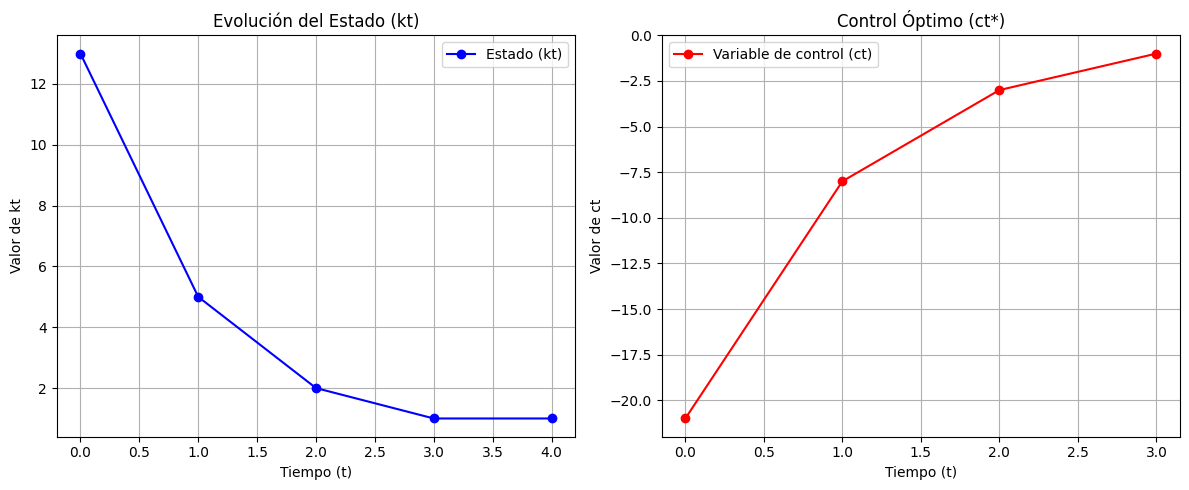


Trayectoria Óptima Calculada:
t=0: kt=13, ct*=-21
t=1: kt=5, ct*=-8
t=2: kt=2, ct*=-3
t=3: kt=1, ct*=-1
Estado Final k4=1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN DEL PROBLEMA  ---
# Maximizar V = sum_{t=0}^{3} -(kt^2 + ct^2) - k4^2
# Sujeto a: k_{t+1} = 2*kt + ct
T = 3  # Horizonte temporal (periodos 0, 1, 2, 3)
k0 = 13 # Estado inicial dado

# Se crean arrays para almacenar los coeficientes calculados paso a paso
# La función de valor tiene la forma Vt(kt) = At * kt^2
# La función de política tiene la forma ct* = ht * kt
A = np.zeros(T + 2)  # Coeficientes de la función de valor
h = np.zeros(T + 1)  # Coeficientes de la función de política

# --- 2. PROCEDIMIENTO PASO A PASO: INDUCCIÓN HACIA ATRÁS  ---

# Paso 1: Definir valor terminal V_{T+1}(k_{T+1}) = -k4^2
# Por lo tanto, A4 = -1
A[T+1] = -1

print("Iniciando Inducción Hacia Atrás...")
for t in range(T, -1, -1):
    # En cada etapa buscamos maximizar: -(kt^2 + ct^2) + A_{t+1} * (2kt + ct)^2
    # Derivando respecto a ct e igualando a cero :
    # -2*ct + 2 * A_{t+1} * (2*kt + ct) = 0

    # Despejando ct en función de kt para hallar la función de política (ht):
    # ct * (1 - A_{t+1}) = 2 * A_{t+1} * kt
    h[t] = (2 * A[t+1]) / (1 - A[t+1])

    # Sustituimos ct* en la ecuación de Bellman para actualizar At :
    # At = -(1 + ht^2) + A_{t+1} * (2 + ht)^2
    A[t] = -(1 + h[t]**2) + A[t+1] * (2 + h[t])**2

    print(f"Periodo t={t}: Coeficiente Política ht={h[t]:.2f}, Coeficiente Valor At={A[t]:.2f}")

# --- 3. RECONSTRUCCIÓN DE LA TRAYECTORIA (FORWARD PASS)  ---
k_vals = np.zeros(T + 2)
c_vals = np.zeros(T + 1)

k_vals[0] = k0
for t in range(T + 1):
    c_vals[t] = h[t] * k_vals[t]  # Aplicar función de política hallada
    k_vals[t+1] = 2 * k_vals[t] + c_vals[t] # Evolución del estado

# --- 4. VISUALIZACIÓN DE RESULTADOS ---
plt.figure(figsize=(12, 5))

# Gráfico de la trayectoria de kt
plt.subplot(1, 2, 1)
plt.plot(range(T + 2), k_vals, 'bo-', label='Estado (kt)')
plt.title('Evolución del Estado (kt)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Valor de kt')
plt.grid(True)
plt.legend()

# Gráfico de la trayectoria de ct
plt.subplot(1, 2, 2)
plt.plot(range(T + 1), c_vals, 'ro-', label='Variable de control (ct)')
plt.title('Control Óptimo (ct*)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Valor de ct')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Verificación con los valores exactos
print("\nTrayectoria Óptima Calculada:")
for t in range(T + 1):
    print(f"t={t}: kt={k_vals[t]:.0f}, ct*={c_vals[t]:.0f}")
print(f"Estado Final k4={k_vals[T+1]:.0f}")